# PyTplot pseudo variables

This notebook shows how to work with pseudo variables in PyTplot

The following line installs the version of pytplot used by pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pyspedas

In [3]:
pyspedas.mms.fpi(datatype='des-moms', trange=['2015-10-16', '2015-10-17'])
pyspedas.mms.edp(trange=['2015-10-16', '2015-10-17'], datatype='scpot')

21-Oct-23 11:05:12: Downloading mms1_fpi_fast_l2_des-moms_20151016040000_v3.4.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
21-Oct-23 11:05:13: Downloading mms1_fpi_fast_l2_des-moms_20151016060000_v3.4.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
21-Oct-23 11:05:16: Downloading mms1_fpi_fast_l2_des-moms_20151016080000_v3.4.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
21-Oct-23 11:05:20: Downloading mms1_fpi_fast_l2_des-moms_20151016100000_v3.4.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
21-Oct-23 11:05:23: Downloading mms1_fpi_fast_l2_des-moms_20151016120000_v3.4.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
21-Oct-23 11:05:27: Downloading mms1_fpi_fast_l2_des-moms_20151016140000_v3.4.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
21-Oct-23 11:05:30: Downloading mms1_fpi_fast_l2_des-moms_20151016160000_v3.4.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
21-Oct-23 11:05:33: Loaded variables:
21-Oct-23 11:05:33: Epoch
21-Oct-23 11:05:33: Epoch_plus_var
21-Oc

['mms1_edp_scpot_fast_l2', 'mms1_edp_psp_fast_l2', 'mms1_edp_dcv_fast_l2']

Create a pseudo variable containing the perpendicular and parallel temperatures

In [4]:
from pytplot import store_data

In [5]:
store_data('temp', data=['mms1_des_tempperp_fast', 'mms1_des_temppara_fast'])

True

Plot the pseudo variable

Note: by default, the figure uses the metadata from the first variable in the list

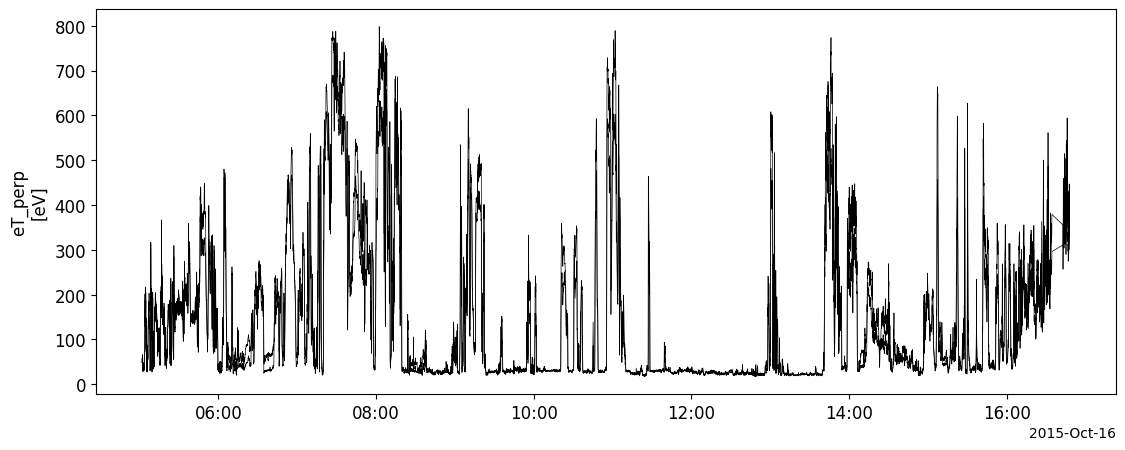

In [6]:
from pytplot import tplot

tplot('temp')

The plot options can be updated just like a normal tplot variable

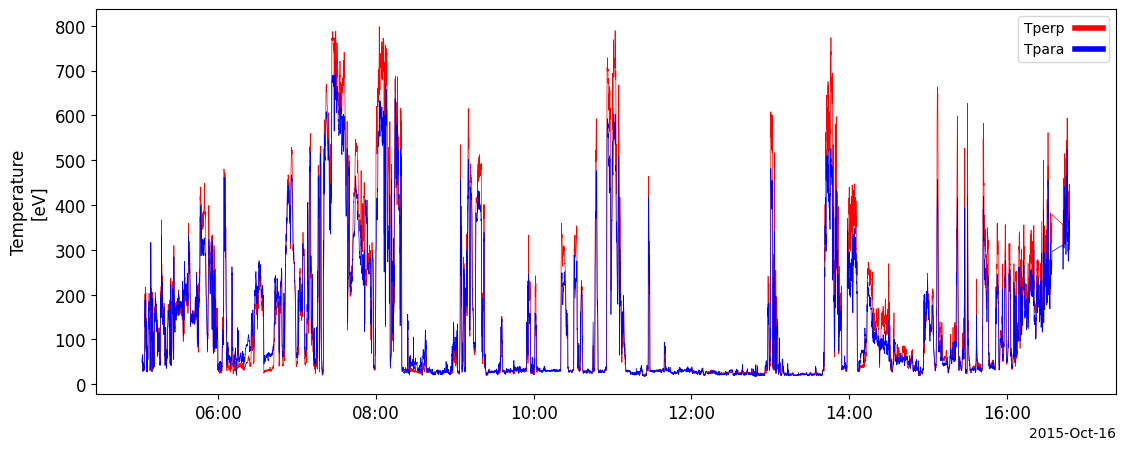

In [7]:
from pytplot import options

options('temp', 'ytitle', 'Temperature')
options('temp', 'color', ['red', 'blue'])
options('temp', 'legend_names', ['Tperp', 'Tpara'])

tplot('temp')

Pseudo variables can be used to plot lines over spectrograms, e.g., to plot the spacecraft potential over the ion energy spectra:


In [8]:
store_data('spec', data=['mms1_des_energyspectr_omni_fast', 'mms1_edp_scpot_fast_l2'])

True

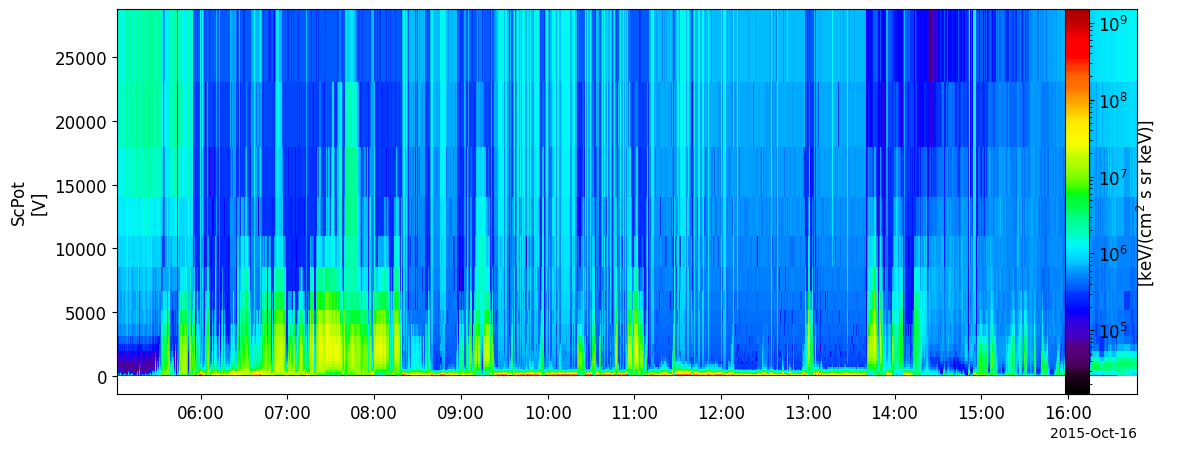

In [9]:
tplot('spec')

Options set on the variables used in the pseudo variable can be adjusted directly, e.g., 

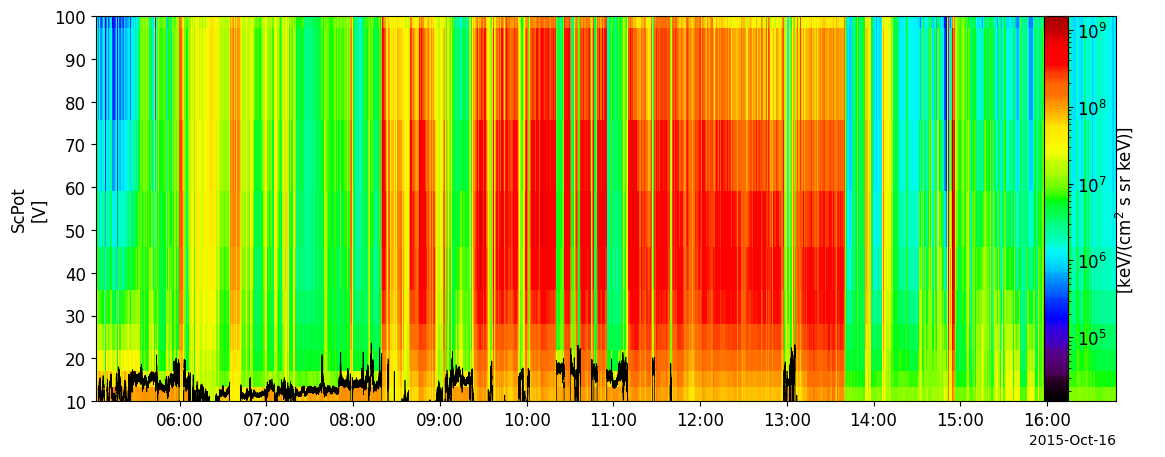

In [10]:
options('mms1_edp_scpot_fast_l2', 'yrange', [10, 100])

tplot('spec', xsize=12)

You may have to adjust some plot options for the figure to come out nicely, e.g., to plot the S/C potential on the right axis, use the `right_axis` option, and increase the margin to include enough space for the new axis

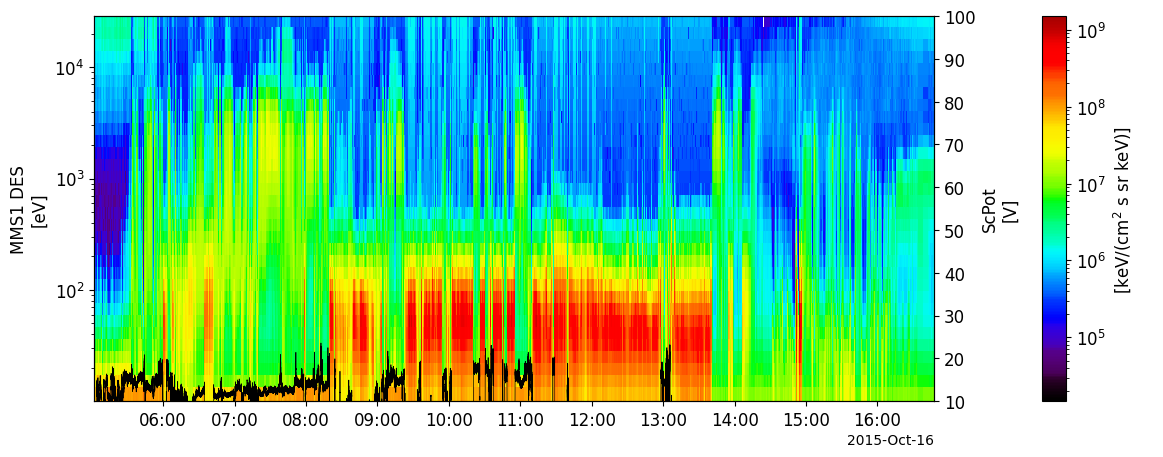

In [11]:
from pytplot import tplot_options

options('spec', 'right_axis', True)
tplot_options('xmargin', [0.1, 0.2])

tplot('spec', xsize=12)